In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.columns = ['CID', ' Gender', 'Age', 'AnnualIncome', 'SpendingScore']
df.head()

,CID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
x = df.iloc[:,-2:]
x.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


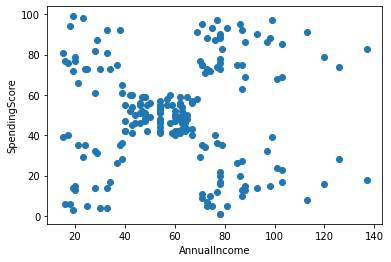

In [25]:
plt.scatter(x['AnnualIncome'], x['SpendingScore'])
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\Ashwin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156588, 22143.22210076745, 19664.685196005543, 17594.047906098698, 15845.619372815672, 15050.333715442262, 13201.95371135932, 12100.442586580084, 10954.637822703613, 10200.976956376957, 9353.057307426872, 8995.389660829365]


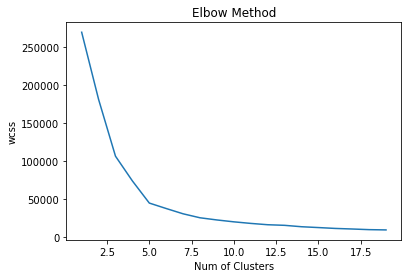

In [21]:
wcss = []                      # wihtin cluster sum of sqaure 
for i in range (1,20):         # i = 1,2,3.....9 = num of clusters  
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)
    
print(wcss)
plt.plot(list(range(1,20)), wcss)
plt.xlabel('Num of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show()

In [27]:
for i in range (2,10): # i = no.  of clusters
    m = KMeans(n_clusters=i).fit(x)
    print(f'Silhoutte score at K ={i}', silhouette_score(x, m.labels_))

Silhoutte score at K =2 0.2968969162503008
Silhoutte score at K =3 0.46761358158775435
Silhoutte score at K =4 0.4931963109249047
Silhoutte score at K =5 0.553931997444648
Silhoutte score at K =6 0.53976103063432
Silhoutte score at K =7 0.5288104473798049
Silhoutte score at K =8 0.45704384633565154
Silhoutte score at K =9 0.4565077334305076


### Optimal Number of clusters=5

In [28]:
k5 = KMeans(n_clusters=5)
k5.fit(x)
ypred5 = k5.predict(x)
print(ypred5)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [29]:
from collections import Counter
c1 = Counter(ypred5)
print(c1)

Counter({0: 81, 4: 39, 1: 35, 2: 23, 3: 22})


In [30]:
cent5 = k5.cluster_centers_
print(cent5)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


In [31]:
df['cls5'] = ypred5

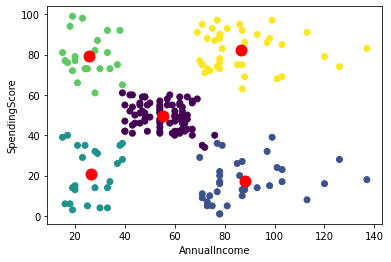

In [33]:
plt.scatter(x['AnnualIncome'], x['SpendingScore'], c=df['cls5'])
plt.scatter(cent5[:,0], cent5[:,1], color= 'red', s=120)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.show()

### Cluster profiling

In [34]:
df.columns

Index(['CID', ' Gender', 'Age', 'AnnualIncome', 'SpendingScore', 'cls5'], dtype='object')

In [37]:
res = df.iloc[:,3:].groupby('cls5').mean()
res

,AnnualIncome,SpendingScore
cls5,,
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205


In [38]:
res1 = pd.DataFrame({'AnnualIncome': df['AnnualIncome'].mean(), 'SpendingScore': df['SpendingScore'].mean()}, index=['Avg'])
res1

,AnnualIncome,SpendingScore
Avg,60.56,50.2


In [39]:
profiling = pd.concat([res1, res])
profiling

,AnnualIncome,SpendingScore
Avg,60.560000,50.200000
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205
